`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Загрузим датафрейм
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Provider/telecom_users.csv', index_col='Unnamed: 0')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [ ]:
# Проверим данные в датасете на наличие пропущенных значений
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Сделаем копию и внесем некоторые изменения
df1 = df.copy()

# Изменим значения колонки gender так, чтобы объединить колонки gender и SeniorCitizen в одну
df1['gender'] = df1['gender'].replace('Male', 0)
df1['gender'] = df1['gender'].replace('Female', 2)
df1['all_categories'] = df1['gender']+df1['SeniorCitizen']

In [ ]:
# # Уберем не нужные колонки
df1 = df1.drop(['gender', 'SeniorCitizen', 'customerID', 'TotalCharges'], axis=1)

In [ ]:
# Для удобства изменим порядок колонок
cols = df1.columns[-2::]
cols = cols.append(df1.columns[:16:])
cols
df1=df1.reindex(columns=cols)
df1

,Churn,all_categories,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1869,No,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10
4528,No,2,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15
6344,Yes,3,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95
6739,No,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90
432,No,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Yes,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00
5191,No,2,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10
5226,No,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15
5390,Yes,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45


In [ ]:
# Приведем колонки, имеющие от 1 до 4 значений к категориальному виду

cols2 = df1.columns.drop(['all_categories','tenure', 'MonthlyCharges'])
for col in cols2:
    df1[col] = df1[col].astype('category')


df1[cols2] = df1[cols2].apply(lambda x: x.cat.codes)
# Разобьем значения колонок, имеющих более 4 значений, на несколько категорий
# df1.loc[df1['tenure'] <= 18, 'tenure'] = 0
# df1.loc[(df1['tenure'] > 18) & (df1['tenure'] <= 36), 'tenure'] = 1
# df1.loc[(df1['tenure'] > 36) & (df1['tenure'] <= 54), 'tenure']   = 2
# df1.loc[ df1['tenure'] > 54, 'tenure'] = 3

# df1.loc[df1['MonthlyCharges'] <= 43.375, 'MonthlyCharges'] = 0
# df1.loc[(df1['MonthlyCharges'] > 43.375) & (df1['MonthlyCharges'] <= 61.625), 'MonthlyCharges'] = 1
# df1.loc[(df1['MonthlyCharges'] > 61.625) & (df1['MonthlyCharges'] <= 79.875), 'MonthlyCharges'] = 2
# df1.loc[ df1['MonthlyCharges'] > 79.875, 'MonthlyCharges'] = 3

df1

,Churn,all_categories,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1869,0,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10
4528,0,2,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15
6344,1,3,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95
6739,0,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90
432,0,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00
5191,0,2,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10
5226,0,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45


# 2. Исследование зависимостей и формулирование гипотез

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

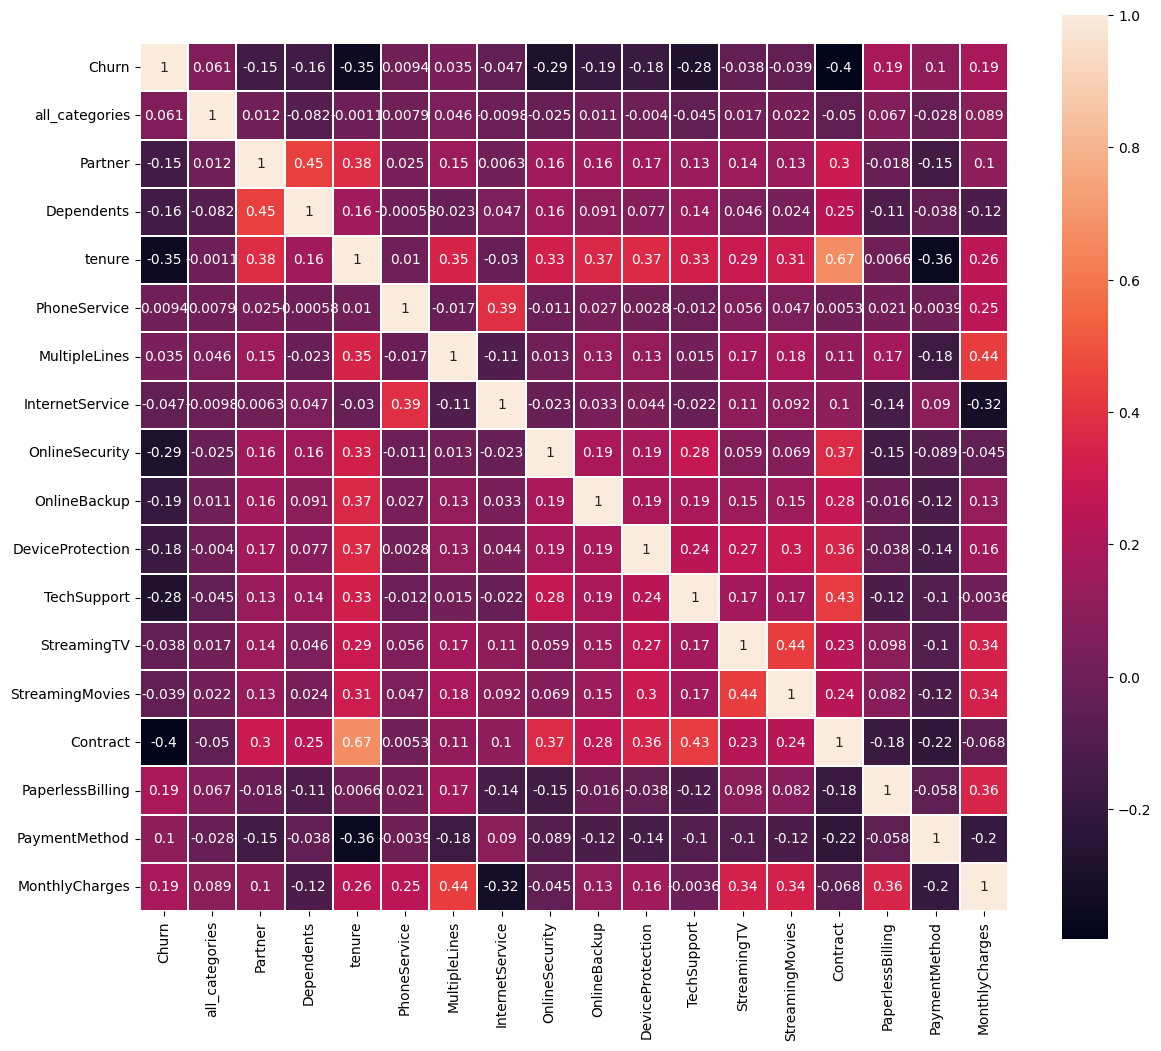

In [ ]:
# Проверим зависимости между данными, построив тепловую карту
plt.figure(figsize=(14,12))
sns.heatmap(df1.corr(),linewidths=0.1,vmax=1.0,
            square=True, linecolor='white', annot=True)
plt.show()

Карта показала слабую зависомость между Churn и all_categoies, что говорит о том что на уход меньше
всего влияет возраст и пол клиентов, а наибольшее влияние оказывает длительность пользования клиентов услугами провайдера
и пользование электронным биллингом

# 3. Построение моделей для прогнозирования оттока

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
# Для построения модели выберем целевой столбец и фичи
targets = df1['Churn']
data = df1.drop(columns='Churn')

#Разобьем массив на тренировочный и валидационный
x_train, x_valid, y_train, y_valid = train_test_split(data,
                                                    targets,
                                                    train_size=0.3,
                                                    random_state=17)


# параметры базовых алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.5, 1, 0.1)} # LogisticRegression

rfc = RandomForestClassifier(random_state=17)
gbc = GradientBoostingClassifier(random_state=17)
lr = LogisticRegression(max_iter=300, random_state=17)
svc = SVC(probability=1,random_state=17)

In [ ]:
# Обучим модели для выбора наилучших параметров

gs_rfc = GridSearchCV(rfc, rfc_params)
gs_gbc = GridSearchCV(gbc, gbc_params)
gs_lr = GridSearchCV(lr, lr_params)
gs_svc = GridSearchCV(svc, svc_params)

gs_rfc_model = gs_rfc.fit(x_train,y_train)
gs_gbc_model = gs_gbc.fit(x_train,y_train)
gs_lr_model = gs_lr.fit(x_train,y_train)
gs_svc_model = gs_svc.fit(x_train,y_train)

In [ ]:
rfc_best_params = gs_rfc_model.best_params_
gbc_best_params = gs_gbc_model.best_params_
lr_best_params = gs_lr_model.best_params_
svc_best_params = gs_svc_model.best_params_

In [ ]:
print(f'Best parameters for rfc: {rfc_best_params}')
print(f'Best parameters for gbc: {gbc_best_params}')
print(f'Best parameters for lr: {lr_best_params}')
print(f'Best parameters for svc: {svc_best_params}')

Best parameters for rfc: {'min_samples_leaf': 4, 'n_estimators': 60}
Best parameters for gbc: {'learning_rate': 0.1}
Best parameters for lr: {'C': 0.5}
Best parameters for svc: {'C': 0.30000000000000004, 'kernel': 'linear'}


In [ ]:
# Обучим модели и измерим точность предсказаний
rfc_pred = gs_rfc_model.predict(x_valid)
accuracy_score(y_valid, rfc_pred)

0.798616082080649

In [ ]:
gbc_pred = gs_gbc_model.predict(x_valid)
accuracy_score(y_valid, gbc_pred)

0.7952755905511811

In [ ]:
lr_pred = gs_lr_model.predict(x_valid)
accuracy_score(y_valid, lr_pred)

0.7962300167024576

In [ ]:
svc_pred = gs_svc_model.predict(x_valid)
accuracy_score(y_valid, svc_pred)

0.7926509186351706

Точность всех использованных моделей составляет 0,79, что говорит, о высокой точности предсказаний.
Разница в оценке точности моделей определяется тысячными долями

# 4. Сравнение качества моделей

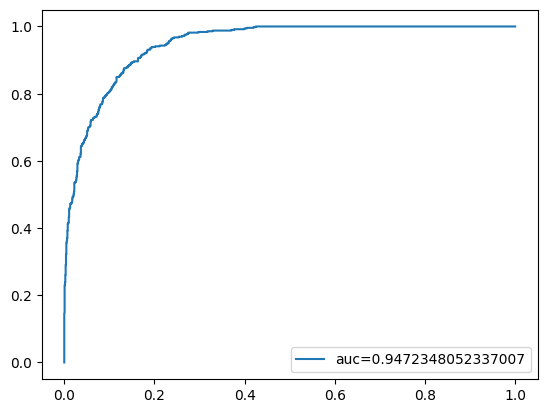

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

#Сравним модели по метрике ROC_AUC

probas = gs_rfc_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()

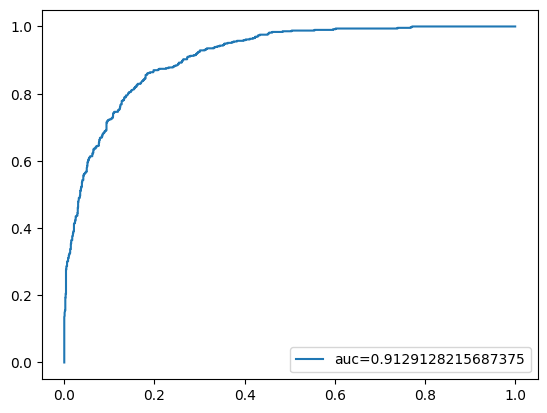

In [ ]:
probas = gs_gbc_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()

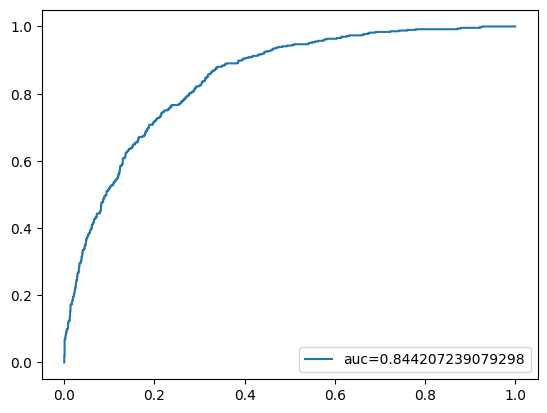

In [ ]:
probas = gs_lr_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()

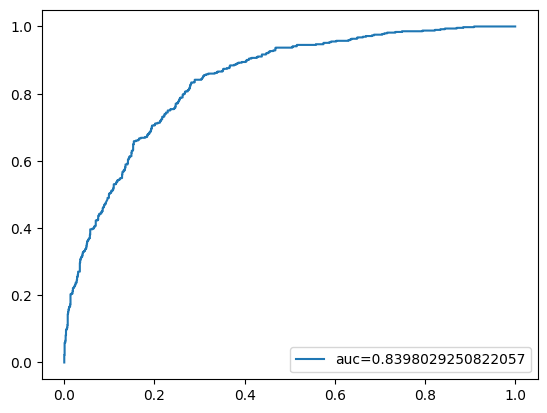

In [ ]:
probas = gs_svc_model.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()

Наибольшее значение по метрике roc_auc показывает модель случайного леса, наименьшую - модель SVC, однако
как видно на графиках оценка всех моделей больше 0,8, что говорит о высокой точности предсказания моделей и низкой
вероятности ошибки